In [965]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [966]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [967]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [968]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    old_score = pointcdic['oldnet'] / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and elo < 0:
        elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

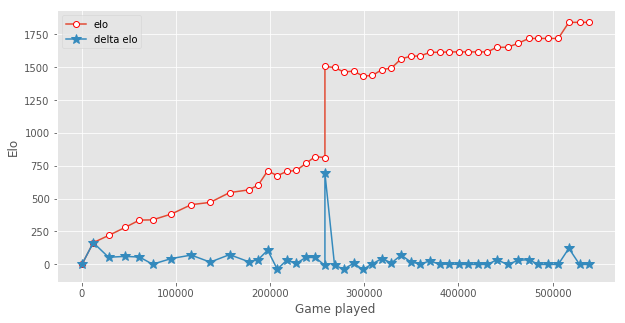

In [969]:
plt.figure(figsize=(10,5))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [970]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate
37,2018-09-10_06-13-25_noup,35.020327,1648.871874,440939,10188,0.223744,219,0.550228
38,2018-09-11_21-13-25_noup,0.000000,1648.871874,452198,11259,0.310502,219,0.497717
39,2018-09-12_04-13-25_noup,30.736012,1679.607886,463572,11374,0.289916,238,0.544118
40,2018-09-12_11-13-26_noup,36.476061,1716.083947,474848,11276,0.234310,239,0.552301
41,2018-09-12_18-13-25_noup,0.000000,1716.083947,484917,10069,0.218487,238,0.403361
42,2018-09-13_10-13-24_noup,0.000000,1716.083947,495231,10314,0.234310,239,0.497908
43,2018-09-13_18-13-25_noup,0.000000,1716.083947,506073,10842,0.169492,236,0.440678
44,2018-09-14_00-13-25_noup,122.063844,1838.147791,517340,11267,0.164557,237,0.668776
45,2018-09-14_05-13-26_noup,0.000000,1838.147791,528694,11354,0.108787,239,0.485356
46,2018-09-14_09-13-25_noup,0.000000,1838.147791,538967,10273,0.100840,238,0.495798


In [979]:
!ls -l ../data/distributed/ | wc -l 

11947


In [980]:
!ls -l ../data/distributed/ | grep peace | wc -l

52


In [981]:
! date

2018年 09月 14日 星期五 14:07:30 CST


In [974]:
list(range(1,2))

[1]